<a href="https://colab.research.google.com/github/jcj217-mc/Data_205/blob/main/Data_205_Project_Part_I_detention_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import packages
import pandas as pd
import numpy as np
import os 

In [7]:
# check working directory
os.getcwd()

'/content'

In [8]:
# change working directory - Jupyter hard drive only
# os.chdir('/Users/Valued Customer/Desktop/Montgomery College/DATA 205/Project')

FileNotFoundError: ignored

In [ ]:
# check new working directory - only for Jupyter 
# os.getcwd()

In [9]:
# Jupyter: read Correctional Facility Average Daily Population dataset of from a CSV and store the results in a DataFrame
df_1 = pd.read_csv("Correctional_Facility_Average_Daily_Population.csv", index_col=False)
head = df_1.head(10)
print(head)

               Month/Year  ... Average Daily Population
0  01/01/2016 12:00:00 AM  ...                      124
1  02/01/2017 12:00:00 AM  ...                      508
2  02/01/2017 12:00:00 AM  ...                      707
3  02/01/2017 12:00:00 AM  ...                      129
4  02/01/2017 12:00:00 AM  ...                      731
5  09/01/2015 12:00:00 AM  ...                      703
6  11/01/2015 12:00:00 AM  ...                      655
7  02/01/2017 12:00:00 AM  ...                       59
8  02/01/2017 12:00:00 AM  ...                      156
9  03/01/2017 12:00:00 AM  ...                      563

[10 rows x 5 columns]


In [10]:
df_1.head()

,Month/Year,Detention Services and Community Corrections,Detention Services and Community Corrections Names,Category,Average Daily Population
0,01/01/2016 12:00:00 AM,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,124
1,02/01/2017 12:00:00 AM,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,508
2,02/01/2017 12:00:00 AM,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,707
3,02/01/2017 12:00:00 AM,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,129
4,02/01/2017 12:00:00 AM,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,731


Note:  Montgomery County Correctional Facility (MCFF) custody of pre-trial status or serving up to 18 months.  Montgomery County Detention Center (MCDC) is where initial intake screenings occur prior to transfer to the correctional facility.

In [69]:
# Remove "0:00" from Month/Year column
df_1['Month/Year'].str.rstrip('12:00:00')

KeyError: ignored

In [12]:
# check dataframe type
type(df_1)

pandas.core.frame.DataFrame

In [19]:
# Change column names with rename() function
df_1 = df_1.rename(columns = {"Month/Year": "Date", "Detention Services and Community Corrections":"DSCC Abbr.", "Detention Services and Community Corrections Names":"DSCC Names", "Average Daily Population" : "Avg. Daily Pop."})

In [20]:
# Checking column name change
df_1.head(1)

,Date,DSCC Abbr.,DSCC Names,Category,Avg. Daily Pop.
0,01/01/2016 12:00:00 AM,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,124


In [21]:
# the 0:00 that was previously stripped was added back in.  Will try to strip again.
df_1['Date'].str.rstrip('0:00')

0      01/01/2016 12:00:00 AM
1      02/01/2017 12:00:00 AM
2      02/01/2017 12:00:00 AM
3      02/01/2017 12:00:00 AM
4      02/01/2017 12:00:00 AM
                ...          
439    02/01/2021 12:00:00 AM
440    02/01/2021 12:00:00 AM
441    02/01/2021 12:00:00 AM
442    02/01/2021 12:00:00 AM
443    02/01/2021 12:00:00 AM
Name: Date, Length: 444, dtype: object

In [24]:
# Checking second strip
df_1.head(1)

,Date,DSCC Abbr.,DSCC Names,Category,Avg. Daily Pop.
0,01/01/2016 12:00:00 AM,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,124


In [25]:
# Checking data types for each column
print(df_1.dtypes)

Date               object
DSCC Abbr.         object
DSCC Names         object
Category           object
Avg. Daily Pop.     int64
dtype: object


In [26]:
#Checking Shape
print(df_1.shape)

(444, 5)


In [27]:
# Describe
df_1.describe()

,Avg. Daily Pop.
count,444.000000
mean,374.328829
std,291.345574
min,0.000000
25%,107.000000
50%,247.500000
75%,627.250000
max,1025.000000


In [28]:
df_1["DSCC Names"].value_counts()

Montgomery County Detention Center            74
Pre-Trial Supervision Unit                    74
Intervention Program for Substance Abusers    74
Montgomery County Correctional Facility       74
Pre-Release and Re-Entry Services             74
Alternative Community Services                74
Name: DSCC Names, dtype: int64

In [29]:
# Check null 
df_1.isnull()

,Date,DSCC Abbr.,DSCC Names,Category,Avg. Daily Pop.
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
439,False,False,False,False,False
440,False,False,False,False,False
441,False,False,False,False,False
442,False,False,False,False,False


In [30]:
# Null sum
df_1.isnull().sum()

Date               0
DSCC Abbr.         0
DSCC Names         0
Category           0
Avg. Daily Pop.    0
dtype: int64

In [91]:
# Basic Plots with Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')

In [33]:
# group by Month/Year
df_1_time = df_1.groupby('Date')

In [34]:
df_1_time.head(5)

,Date,DSCC Abbr.,DSCC Names,Category,Avg. Daily Pop.
0,01/01/2016 12:00:00 AM,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,124
1,02/01/2017 12:00:00 AM,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,508
2,02/01/2017 12:00:00 AM,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,707
3,02/01/2017 12:00:00 AM,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,129
4,02/01/2017 12:00:00 AM,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,731
...,...,...,...,...,...
438,02/01/2021 12:00:00 AM,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,50
439,02/01/2021 12:00:00 AM,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0
440,02/01/2021 12:00:00 AM,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,325
441,02/01/2021 12:00:00 AM,IPSA,Intervention Program for Substance Abusers,Criminal Justice Clients under Pre-Trial Services,68


In [37]:
# Arrange by DSCC Abbreviation
df_1_abbr = df_1.groupby('DSCC Abbr.')

In [38]:
# 
df_1_abbr.head()

,Date,DSCC Abbr.,DSCC Names,Category,Avg. Daily Pop.
0,01/01/2016 12:00:00 AM,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,124
1,02/01/2017 12:00:00 AM,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,508
2,02/01/2017 12:00:00 AM,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,707
3,02/01/2017 12:00:00 AM,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,129
4,02/01/2017 12:00:00 AM,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,731
5,09/01/2015 12:00:00 AM,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,703
6,11/01/2015 12:00:00 AM,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,655
7,02/01/2017 12:00:00 AM,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,59
8,02/01/2017 12:00:00 AM,IPSA,Intervention Program for Substance Abusers,Criminal Justice Clients under Pre-Trial Services,156
9,03/01/2017 12:00:00 AM,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,563


In [39]:
# Arrange by DSCC Abbreviation then by sort by Date
df_1_abbr2 = df_1.groupby('DSCC Abbr.').apply(lambda x: x.sort_values('Date'))

In [40]:
df_1_abbr2.head(30)

Date  ... Avg. Daily Pop.
DSCC Abbr.                              ...                
ACS        19   01/01/2015 12:00:00 AM  ...             721
           209  01/01/2016 12:00:00 AM  ...             814
           388  01/01/2017 12:00:00 AM  ...             700
           155  01/01/2018 12:00:00 AM  ...             655
           82   01/01/2019 12:00:00 AM  ...             564
           188  01/01/2020 12:00:00 AM  ...             620
           437  01/01/2021 12:00:00 AM  ...             335
           149  02/01/2015 12:00:00 AM  ...             738
           357  02/01/2016 12:00:00 AM  ...             838
           4    02/01/2017 12:00:00 AM  ...             731
           148  02/01/2018 12:00:00 AM  ...             653
           90   02/01/2019 12:00:00 AM  ...             625
           199  02/01/2020 12:00:00 AM  ...             634
           440  02/01/2021 12:00:00 AM  ...             325
           226  03/01/2015 12:00:00 AM  ...             749
           236  03/01/2016 12:00:00 AM  ...             885
           14   03/01/2017 12:00:00 AM  ...             703
           220  03/01/2018 12:00:00 AM  ...             688
           102  03/01/2019 12:00:00 AM  ...             655
           302  03/01/2020 12:00:00 AM  ...             576
           296  04/01/2015 12:00:00 AM  ...             780
           224  04/01/2016 12:00:00 AM  ...             962
           17   04/01/2017 12:00:00 AM  ...             649
           230  04/01/2018 12:00:00 AM  ...             707
           153  04/01/2019 12:00:00 AM  ...             637
           210  04/01/2020 12:00:00 AM  ...             521
           303  05/01/2015 12:00:00 AM  ...             751
           219  05/01/2016 12:00:00 AM  ...            1025
           27   05/01/2017 12:00:00 AM  ...             644
           235  05/01/2018 12:00:00 AM  ...             681

[30 rows x 5 columns]

In [41]:
# Simplify name
df_2 = df_1_abbr2

In [43]:
# Dates
# GB = df_1_abbr2.groupby([(df_1_abbr2.index.year), (df_1_abbr2.index.month)]).sum()

In [ ]:
# Dates attempt 2
#df_2['Year']= df_2['Date'].apply(lambda x: getYear(x))
#df_2['Month']= df_2['Date'].apply(lambda x: getMonth(x))
#df_2['Day']= df_2['Date'].apply(lambda x: getDay(x))
#df_2['YearMonth']= df_2['Date'].apply(lambda x: getYearMonth(x))

In [92]:
# Create separate columns for month day and year 
df_2.Date = pd.to_datetime(df_2.Date)


In [45]:
df_2[['month', 'year']] = df_2.Date.apply(lambda x: pd.Series(x.strftime("%m, %Y").split(",")))
df_2

Date DSCC Abbr.  ... month   year
DSCC Abbr.                            ...             
ACS        19  2015-01-01        ACS  ...    01   2015
           209 2016-01-01        ACS  ...    01   2016
           388 2017-01-01        ACS  ...    01   2017
           155 2018-01-01        ACS  ...    01   2018
           82  2019-01-01        ACS  ...    01   2019
...                   ...        ...  ...   ...    ...
PTSU       161 2016-12-01       PTSU  ...    12   2016
           137 2017-12-01       PTSU  ...    12   2017
           70  2018-12-01       PTSU  ...    12   2018
           179 2019-12-01       PTSU  ...    12   2019
           431 2020-12-01       PTSU  ...    12   2020

[444 rows x 7 columns]

In [ ]:
#df_2['month'], df_2['day'], df_2['year'] = df_2.Date.dt.month, df_2.Date.dt.day, df_2.Date.dt.year
#df_

In [46]:
df_2.groupby(df_2['year'])
df_2.head(10)

Date DSCC Abbr.  ... month   year
DSCC Abbr.                            ...             
ACS        19  2015-01-01        ACS  ...    01   2015
           209 2016-01-01        ACS  ...    01   2016
           388 2017-01-01        ACS  ...    01   2017
           155 2018-01-01        ACS  ...    01   2018
           82  2019-01-01        ACS  ...    01   2019
           188 2020-01-01        ACS  ...    01   2020
           437 2021-01-01        ACS  ...    01   2021
           149 2015-02-01        ACS  ...    02   2015
           357 2016-02-01        ACS  ...    02   2016
           4   2017-02-01        ACS  ...    02   2017

[10 rows x 7 columns]

In [48]:
# Remove DSCC Name Column
df_2.drop(df_2.columns[[2]], axis=1, inplace=True,)
df_2.head(5)

Date DSCC Abbr.  Avg. Daily Pop. month   year
DSCC Abbr.                                                        
ACS        19  2015-01-01        ACS              721    01   2015
           209 2016-01-01        ACS              814    01   2016
           388 2017-01-01        ACS              700    01   2017
           155 2018-01-01        ACS              655    01   2018
           82  2019-01-01        ACS              564    01   2019

In [49]:
# Create separate columns for month day and year 
df_1.Date = pd.to_datetime(df_1.Date)

In [50]:
df_1[['month', 'year']] = df_1.Date.apply(lambda x: pd.Series(x.strftime("%m, %Y").split(",")))
df_1

,Date,DSCC Abbr.,DSCC Names,Category,Avg. Daily Pop.,month,year
0,2016-01-01,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,124,01,2016
1,2017-02-01,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,508,02,2017
2,2017-02-01,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,707,02,2017
3,2017-02-01,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,129,02,2017
4,2017-02-01,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,731,02,2017
...,...,...,...,...,...,...,...
439,2021-02-01,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0,02,2021
440,2021-02-01,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,325,02,2021
441,2021-02-01,IPSA,Intervention Program for Substance Abusers,Criminal Justice Clients under Pre-Trial Services,68,02,2021
442,2021-02-01,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,485,02,2021


In [53]:
# drop date column
df_1a = df_1.drop(df_1.columns[0:1], axis=1)

In [52]:
df_1a.head(5)

,DSCC Abbr.,DSCC Names,Category,Avg. Daily Pop.,month,year
0,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,124,01,2016
1,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,508,02,2017
2,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,707,02,2017
3,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,129,02,2017
4,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,731,02,2017


In [54]:
#Trying to remove index column
df_1a.reset_index(drop=True, inplace=True)
df_1a.head(5)

,DSCC Abbr.,DSCC Names,Category,Avg. Daily Pop.,month,year
0,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,124,01,2016
1,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,508,02,2017
2,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,707,02,2017
3,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,129,02,2017
4,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,731,02,2017


In [55]:
# Group by Year Sum
df_year = df_1a.groupby(['year'], as_index=False).agg({'Avg. Daily Pop.': sum})
df_year.head()

,year,Avg. Daily Pop.
0,2015,27811
1,2016,30138
2,2017,27102
3,2018,27464
4,2019,25649


Text(0, 0.5, 'Avg. Daily Pop.')

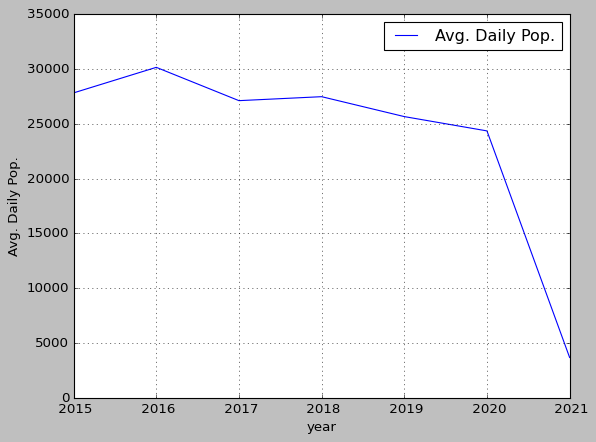

In [56]:
# matplotlib plot
import matplotlib.pyplot as plt
df_year.plot(x = 'year', grid=True)
plt.xlabel('year')
plt.ylabel('Avg. Daily Pop.')

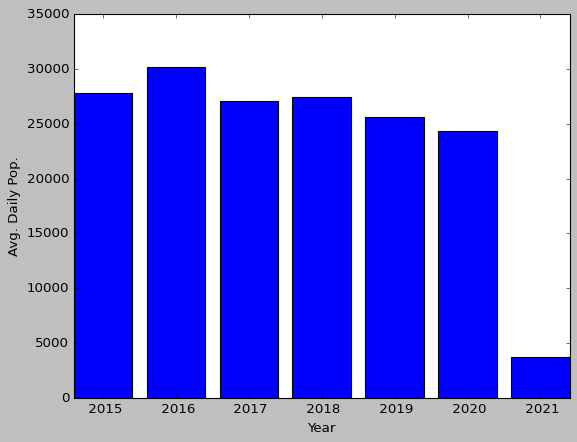

In [67]:
# matplotlib barplot
import matplotlib.pyplot as plt
x = df_year['year']
y = df_year['Avg. Daily Pop.']
plt.bar(x, y)
plt.xlabel('Year')
plt.ylabel('Avg. Daily Pop.')
plt.show()

In [58]:
# Sum of avg. daily pop by month and year
df_monthyear = df_1a.groupby(['year', 'month'], as_index=False).agg({'Avg. Daily Pop.': sum})
df_monthyear.head(20)

,year,month,Avg. Daily Pop.
0,2015,01,2284
1,2015,02,2277
2,2015,03,2273
3,2015,04,2343
4,2015,05,2310
5,2015,06,2228
6,2015,07,2215
7,2015,08,2311
8,2015,09,2320
9,2015,10,2347


Text(0, 0.5, 'Avg. Daily Pop.')

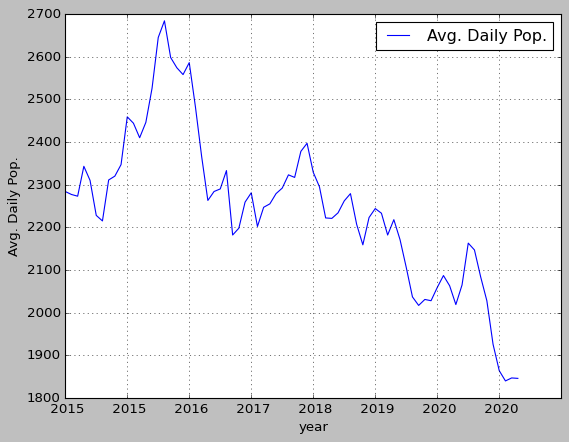

In [59]:
# matplotlib plot
df_monthyear.plot(x = 'year', grid=True)
plt.xlabel('year')
plt.ylabel('Avg. Daily Pop.')
# not sure why there were double 2015s and 2020s

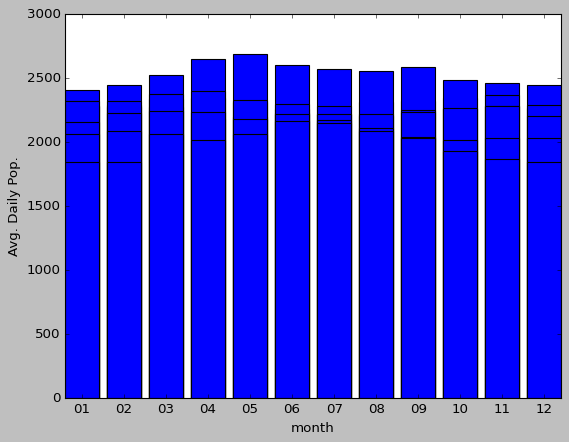

In [60]:
x = df_monthyear['month']
y = df_monthyear['Avg. Daily Pop.']
plt.bar(x, y)
plt.xlabel('month')
plt.ylabel('Avg. Daily Pop.')
plt.show()

In [87]:
# trying to isolate entries by year
# df_monthyear.groupby('year').get_group(2015)

KeyError: ignored

In [82]:
# trying to get rid of the lines and select only months for 2015
df_2015 = df_monthyear[df_monthyear['year'] == '2015']
df_2015.head()

,year,month,Avg. Daily Pop.


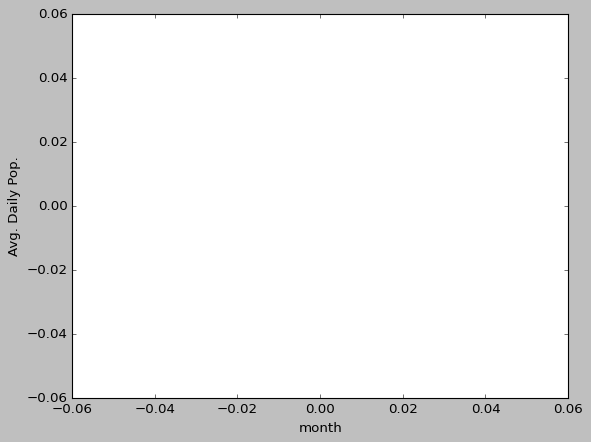

In [76]:
# Trying to Plot only 2015
x = df_2015['month']
y = df_2015['Avg. Daily Pop.']
plt.bar(x, y)
plt.xlabel('month')
plt.ylabel('Avg. Daily Pop.')
plt.show()

In [89]:
# example code:  df[(df['age'] > 28) & (df['grade'] == 'A')]
df_monthyear[(df_monthyear['year'] == '2016')]

,year,month,Avg. Daily Pop.


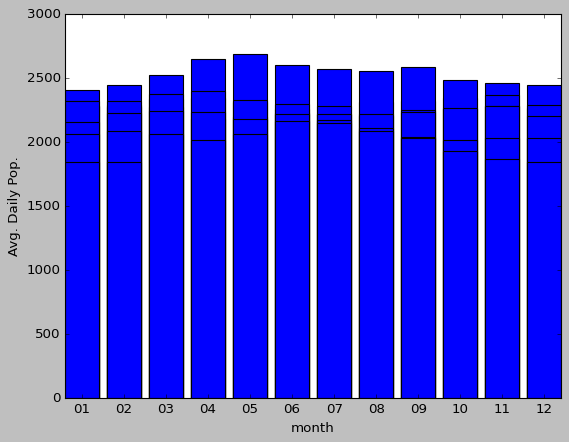

In [63]:
x = df_m_adp['date']
y = df_m_adp['Avg. Daily Pop.']
plt.bar(x, y)
plt.xlabel('month')
plt.ylabel('Avg. Daily Pop.')
plt.show()
# in plot below the separate lines in each bar are for each year. Will try to add color coded stacking.

In [93]:
df_dscc = df_1.groupby('DSCC Names').apply(lambda x: x.sort_values('year'))
df_dscc.head(100)

Date  ...   year
DSCC Names                                                 ...       
Alternative Community Services             163 2015-12-01  ...   2015
                                           5   2015-09-01  ...   2015
                                           149 2015-02-01  ...   2015
                                           19  2015-01-01  ...   2015
                                           142 2015-11-01  ...   2015
...                                                   ...  ...    ...
Intervention Program for Substance Abusers 227 2016-04-01  ...   2016
                                           183 2016-08-01  ...   2016
                                           63  2016-10-01  ...   2016
                                           8   2017-02-01  ...   2017
                                           129 2017-11-01  ...   2017

[100 rows x 7 columns]

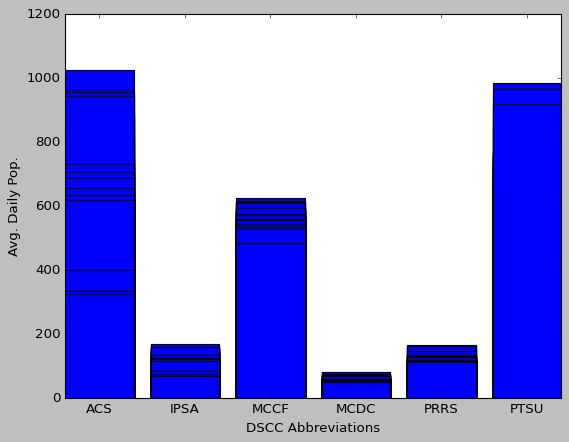

In [66]:
x = df_dscc['DSCC Abbr.']
y = df_dscc['Avg. Daily Pop.']
plt.bar(x, y)
plt.xlabel('DSCC Abbreviations')
plt.ylabel('Avg. Daily Pop.')
plt.show()
# not sure what lines represent, could be month/year.  

ACS - Alternative Community Service
IPSA - Intervention Program for Substance Abusers
MCFF - Montgomery County Correctional Facility
MCDC - Montgomery County Detention Center
PRRS - Pre-Release and Re-Entry Services
PTSU - Pre-Trial Supervision Unit

In [98]:
# remove entries for PRRS